In [1]:
import pydataset
df= pydataset.data("iris")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
# ! pip install -U scikit-learn scipy matplotlib

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense

In [4]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Species'])

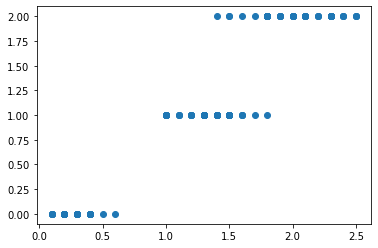

In [5]:
df['Species'] = labels
X = df[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
y = df[['Species']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
plt.scatter(df['Petal.Width'], df['Species'])

plt.show()

In [6]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
knnModel.score(x_test, y_test)

0.9666666666666667

In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid

In [9]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = Sequential()

#ADD FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYERS WILL BE ADDED AUTOAMTICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))


#ADDING OUTPUT LAYER WITH 1 NEURON, AS THIS IS BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [10]:
#now testing for test data

y_pred = ann.predict(x_test)

#converting values
y_pred = (y_pred>0.5)

1/1 [==============================] - 4s 4s/step


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
score1 = accuracy_score(y_test,y_pred)
print(cm)
print("score is",score1)

[[12  0  0]
 [ 2  8  0]
 [ 0  8  0]]
score is 0.6666666666666666


In [12]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.50      0.80      0.62        10
           2       0.00      0.00      0.00         8

    accuracy                           0.67        30
   macro avg       0.45      0.60      0.51        30
weighted avg       0.51      0.67      0.57        30



<AxesSubplot:>

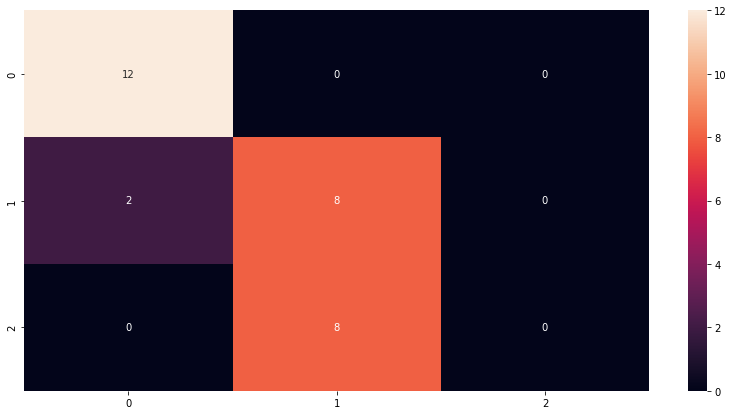

In [13]:
# creating heatmap of confusion matrix 
import seaborn as sns
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot = True)

In [14]:
from tensorflow.keras.layers import BatchNormalization

# creating the ann as sequence of layers

ann = Sequential()

#adding first hidden layer with 30 neurons,the input layer will be added automatically

ann.add(Dense(units=30,activation='softmax'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# adding output layer with 1 neuron, as this a binary classification

ann.add(Dense(units=1,activation='sigmoid'))

In [15]:
#compiling the ann using stochastic gradient descent (optimizer - adam)

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#setting callback for monitoring maximum accuracy

from tabnanny import verbose
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

#traiining the ann with batch size of 32 (this is a batch learning)

model = ann.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
4/4 [==============================] - 3s 147ms/step - loss: 0.6295 - accuracy: 0.2500 - val_loss: 0.6313 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 26ms/step - loss: 0.5612 - accuracy: 0.3500 - val_loss: 0.6115 - val_accuracy: 0.3333
Epoch 3/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5119 - accuracy: 0.3833 - val_loss: 0.5925 - val_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 0.3539 - accuracy: 0.3833 - val_loss: 0.5739 - val_accuracy: 0.3333
Epoch 5/500
4/4 [==============================] - 0s 20ms/step - loss: 0.2874 - accuracy: 0.4167 - val_loss: 0.5560 - val_accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 0.2323 - accuracy: 0.4750 - val_loss: 0.5386 - val_accuracy: 0.3333
Epoch 7/500
4/4 [==============================] - 0s 21ms/step - loss: 0.1237 - accuracy: 0.4417 - val_loss: 0.5217 - val_accuracy: 0.3333
Epoch 8/500
4/4 [==

Epoch 59/500
4/4 [==============================] - 0s 17ms/step - loss: -3.3953 - accuracy: 0.6417 - val_loss: -0.5524 - val_accuracy: 0.3333
Epoch 60/500
4/4 [==============================] - 0s 17ms/step - loss: -3.6246 - accuracy: 0.6417 - val_loss: -0.5910 - val_accuracy: 0.3333
Epoch 61/500
4/4 [==============================] - 0s 18ms/step - loss: -3.7794 - accuracy: 0.6417 - val_loss: -0.6286 - val_accuracy: 0.3333
Epoch 62/500
4/4 [==============================] - 0s 17ms/step - loss: -3.4806 - accuracy: 0.6250 - val_loss: -0.6673 - val_accuracy: 0.3333
Epoch 63/500
4/4 [==============================] - 0s 18ms/step - loss: -3.8986 - accuracy: 0.6417 - val_loss: -0.7074 - val_accuracy: 0.3333
Epoch 64/500
4/4 [==============================] - 0s 17ms/step - loss: -3.8236 - accuracy: 0.6417 - val_loss: -0.7480 - val_accuracy: 0.3333
Epoch 65/500
4/4 [==============================] - 0s 17ms/step - loss: -3.9363 - accuracy: 0.6500 - val_loss: -0.7922 - val_accuracy: 0.3333

4/4 [==============================] - 0s 17ms/step - loss: -10.2257 - accuracy: 0.6417 - val_loss: -4.1346 - val_accuracy: 0.3333
Epoch 117/500
4/4 [==============================] - 0s 17ms/step - loss: -10.1402 - accuracy: 0.6417 - val_loss: -4.2233 - val_accuracy: 0.3333
Epoch 118/500
4/4 [==============================] - 0s 17ms/step - loss: -9.8005 - accuracy: 0.6500 - val_loss: -4.3199 - val_accuracy: 0.3333
Epoch 119/500
4/4 [==============================] - 0s 18ms/step - loss: -10.3164 - accuracy: 0.6417 - val_loss: -4.4181 - val_accuracy: 0.3333
Epoch 120/500
4/4 [==============================] - 0s 17ms/step - loss: -10.2511 - accuracy: 0.6333 - val_loss: -4.5439 - val_accuracy: 0.3333
Epoch 121/500
4/4 [==============================] - 0s 21ms/step - loss: -11.1143 - accuracy: 0.6500 - val_loss: -4.6653 - val_accuracy: 0.3333
Epoch 122/500
4/4 [==============================] - 0s 17ms/step - loss: -10.7576 - accuracy: 0.6417 - val_loss: -4.7889 - val_accuracy: 0.3333


4/4 [==============================] - 0s 18ms/step - loss: -19.9705 - accuracy: 0.6167 - val_loss: -13.3441 - val_accuracy: 0.7000
Epoch 173/500
4/4 [==============================] - 0s 17ms/step - loss: -18.7124 - accuracy: 0.6000 - val_loss: -13.5551 - val_accuracy: 0.7000
Epoch 174/500
4/4 [==============================] - 0s 20ms/step - loss: -19.3392 - accuracy: 0.5583 - val_loss: -13.7068 - val_accuracy: 0.7000
Epoch 175/500
4/4 [==============================] - 0s 15ms/step - loss: -21.4062 - accuracy: 0.5917 - val_loss: -13.9121 - val_accuracy: 0.7000
Epoch 176/500
4/4 [==============================] - 0s 16ms/step - loss: -20.6526 - accuracy: 0.5833 - val_loss: -14.1007 - val_accuracy: 0.7000
Epoch 177/500
4/4 [==============================] - 0s 17ms/step - loss: -19.1998 - accuracy: 0.5667 - val_loss: -14.3485 - val_accuracy: 0.7000
Epoch 178/500
4/4 [==============================] - 0s 17ms/step - loss: -19.4688 - accuracy: 0.5000 - val_loss: -14.6235 - val_accuracy:

4/4 [==============================] - 0s 18ms/step - loss: -31.1129 - accuracy: 0.5583 - val_loss: -24.4110 - val_accuracy: 0.7333
Epoch 229/500
4/4 [==============================] - 0s 17ms/step - loss: -31.7379 - accuracy: 0.5500 - val_loss: -24.6916 - val_accuracy: 0.7333
Epoch 230/500
4/4 [==============================] - 0s 21ms/step - loss: -31.0133 - accuracy: 0.5667 - val_loss: -24.9522 - val_accuracy: 0.7333
Epoch 231/500
4/4 [==============================] - 0s 25ms/step - loss: -29.9406 - accuracy: 0.5667 - val_loss: -25.2219 - val_accuracy: 0.7333
Epoch 232/500
4/4 [==============================] - 0s 20ms/step - loss: -29.7393 - accuracy: 0.6167 - val_loss: -25.3499 - val_accuracy: 0.7333
Epoch 233/500
4/4 [==============================] - 0s 18ms/step - loss: -31.7295 - accuracy: 0.6000 - val_loss: -25.4460 - val_accuracy: 0.7333
Epoch 234/500
4/4 [==============================] - 0s 18ms/step - loss: -31.1423 - accuracy: 0.5250 - val_loss: -25.5504 - val_accuracy:

4/4 [==============================] - 0s 17ms/step - loss: -44.6770 - accuracy: 0.4833 - val_loss: -35.5881 - val_accuracy: 0.7333
Epoch 285/500
4/4 [==============================] - 0s 17ms/step - loss: -44.7861 - accuracy: 0.4750 - val_loss: -35.7761 - val_accuracy: 0.7333
Epoch 286/500
4/4 [==============================] - 0s 17ms/step - loss: -45.1857 - accuracy: 0.5667 - val_loss: -35.9155 - val_accuracy: 0.7333
Epoch 287/500
4/4 [==============================] - 0s 16ms/step - loss: -44.0860 - accuracy: 0.5333 - val_loss: -36.0289 - val_accuracy: 0.7333
Epoch 288/500
4/4 [==============================] - 0s 17ms/step - loss: -46.2154 - accuracy: 0.5500 - val_loss: -36.1441 - val_accuracy: 0.7333
Epoch 289/500
4/4 [==============================] - 0s 18ms/step - loss: -45.9116 - accuracy: 0.4833 - val_loss: -36.3057 - val_accuracy: 0.7333
Epoch 290/500
4/4 [==============================] - 0s 17ms/step - loss: -46.0733 - accuracy: 0.5583 - val_loss: -36.3875 - val_accuracy:

4/4 [==============================] - 0s 17ms/step - loss: -60.2953 - accuracy: 0.5583 - val_loss: -47.2758 - val_accuracy: 0.7333
Epoch 341/500
4/4 [==============================] - 0s 16ms/step - loss: -60.2105 - accuracy: 0.5333 - val_loss: -47.4983 - val_accuracy: 0.7333
Epoch 342/500
4/4 [==============================] - 0s 16ms/step - loss: -60.5744 - accuracy: 0.5083 - val_loss: -47.7257 - val_accuracy: 0.7333
Epoch 343/500
4/4 [==============================] - 0s 18ms/step - loss: -62.6237 - accuracy: 0.4917 - val_loss: -47.9493 - val_accuracy: 0.7333
Epoch 344/500
4/4 [==============================] - 0s 17ms/step - loss: -59.1838 - accuracy: 0.5083 - val_loss: -48.1893 - val_accuracy: 0.7333
Epoch 345/500
4/4 [==============================] - 0s 16ms/step - loss: -62.6438 - accuracy: 0.5083 - val_loss: -48.4019 - val_accuracy: 0.7333
Epoch 346/500
4/4 [==============================] - 0s 17ms/step - loss: -63.6845 - accuracy: 0.4917 - val_loss: -48.5918 - val_accuracy:

4/4 [==============================] - 0s 17ms/step - loss: -69.4747 - accuracy: 0.4667 - val_loss: -60.4193 - val_accuracy: 0.7333
Epoch 397/500
4/4 [==============================] - 0s 17ms/step - loss: -75.9765 - accuracy: 0.4750 - val_loss: -60.6853 - val_accuracy: 0.7333
Epoch 398/500
4/4 [==============================] - 0s 17ms/step - loss: -65.3314 - accuracy: 0.5000 - val_loss: -60.9253 - val_accuracy: 0.7333
Epoch 399/500
4/4 [==============================] - 0s 17ms/step - loss: -73.9485 - accuracy: 0.5417 - val_loss: -61.0739 - val_accuracy: 0.7333
Epoch 400/500
4/4 [==============================] - 0s 19ms/step - loss: -73.8736 - accuracy: 0.4917 - val_loss: -61.2699 - val_accuracy: 0.7333
Epoch 401/500
4/4 [==============================] - 0s 18ms/step - loss: -76.4468 - accuracy: 0.5167 - val_loss: -61.4813 - val_accuracy: 0.7333
Epoch 402/500
4/4 [==============================] - 0s 19ms/step - loss: -77.4018 - accuracy: 0.4917 - val_loss: -61.6390 - val_accuracy:

4/4 [==============================] - 0s 17ms/step - loss: -90.7182 - accuracy: 0.4667 - val_loss: -74.5382 - val_accuracy: 0.7333
Epoch 453/500
4/4 [==============================] - 0s 17ms/step - loss: -90.2003 - accuracy: 0.4917 - val_loss: -74.7895 - val_accuracy: 0.7333
Epoch 454/500
4/4 [==============================] - 0s 18ms/step - loss: -90.6047 - accuracy: 0.5000 - val_loss: -75.0083 - val_accuracy: 0.7333
Epoch 455/500
4/4 [==============================] - 0s 16ms/step - loss: -95.1862 - accuracy: 0.4583 - val_loss: -75.2342 - val_accuracy: 0.7333
Epoch 456/500
4/4 [==============================] - 0s 17ms/step - loss: -92.7786 - accuracy: 0.4667 - val_loss: -75.5048 - val_accuracy: 0.7333
Epoch 457/500
4/4 [==============================] - 0s 17ms/step - loss: -94.7023 - accuracy: 0.4750 - val_loss: -75.7218 - val_accuracy: 0.7333
Epoch 458/500
4/4 [==============================] - 0s 17ms/step - loss: -91.8830 - accuracy: 0.5167 - val_loss: -75.7960 - val_accuracy: